# Flare 2011-08-06
# Fe 5576 $\AA$

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [3]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [4]:
def i_filename(i=0, element="Fe5576"):
    if element == "Fe5576" and i>= 0 and i<= 78:
      if i<10:
        return f'crisp_l2_flare_090005_5576_r0000{i}.fits'
      elif i>=10 and i < 100:
        return f'crisp_l2_flare_090005_5576_r000{i}.fits'        
    elif element == 'Fe6302'and i>= 0 and i<= 78:
      if i<10:
        return f'crisp_l2_flare_090005_6302_r0000{i}.fits'
      elif i>=10 and i < 100:
        return f'crisp_l2_flare_090005_6302_r000{i}.fits'    
    else:
        raise ValueError(f'Given wrong parameters {i=}, {element=}')

def timeframe_to_filename_fits(frame):
    return "fits/Fe/"+i_filename(frame, "Fe5576")
ttff = timeframe_to_filename_fits

In [5]:
with f.open(timeframe_to_filename_fits(0)) as io :
    wvl = io[1].data
    print(wvl)
    print(io)
    print(np.shape(io[0].data), io[0].data[:,500,500])
    
np.save('line_data/wav_Fe5576.npy', wvl)

[6303.93609999 6303.96609999 6303.99609999 6304.02609999 6304.05609999
 6304.08609999 6304.1161     6304.1461     6304.1761     6304.2061
 6304.2361     6304.2661     6304.2961     6304.3261     6304.3561
 6304.38610001 6304.41610001 6304.44610001 6304.47610001 6304.50610001]
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000139F3FD1B50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000139F3FCCB50>]
(20, 1031, 1028) [4869 4915 4749 4655 4604 4213 3637 2958 2553 2539 2863 3353 3681 4009
 4289 4435 4671 4813 4899 5240]


In [6]:
head0 = f.getheader(ttff(0))
head7 = f.getheader(ttff(7))
print(head0["DATE-AVG"], head7["DATE-AVG"])
s = head0["DATE-AVG"]
s[11:23]

2011-08-06T09:00:05.00000 2011-08-06T09:03:23.1000


'09:00:05.000'

In [7]:
head0

SIMPLE  =                    T / Written by IDL:  Tue Sep  1 12:20:23 2015      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                 1028 /                                                
NAXIS2  =                 1031 /                                                
NAXIS3  =                   20 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2015-09-01'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
EXTNAME = 'Fe_I_5576'          /                                                
SOLARNET=             0.500000 /                                                
OBS_HDU =                   

In [8]:
time_list = []
for i in range(79):
    time_list.append(f.getheader(ttff(i))["DATE-AVG"][11:23])
time_list

['09:00:05.000',
 '09:00:33.300',
 '09:01:01.600',
 '09:01:29.900',
 '09:01:58.200',
 '09:02:26.500',
 '09:02:54.800',
 '09:03:23.100',
 '09:03:51.400',
 '09:04:19.700',
 '09:04:48.000',
 '09:05:16.300',
 '09:05:44.600',
 '09:06:12.900',
 '09:06:41.200',
 '09:07:09.500',
 '09:07:37.800',
 '09:08:06.099',
 '09:08:34.400',
 '09:09:02.700',
 '09:09:31.000',
 '09:09:59.300',
 '09:10:27.600',
 '09:10:55.900',
 '09:11:24.200',
 '09:11:52.500',
 '09:12:20.800',
 '09:12:49.100',
 '09:13:17.400',
 '09:13:45.700',
 '09:14:14.000',
 '09:14:42.300',
 '09:15:10.600',
 '09:15:38.900',
 '09:16:07.199',
 '09:16:35.500',
 '09:17:03.799',
 '09:17:32.100',
 '09:18:00.400',
 '09:18:28.700',
 '09:18:57.000',
 '09:19:25.299',
 '09:19:53.600',
 '09:20:21.900',
 '09:20:50.200',
 '09:21:18.500',
 '09:21:46.799',
 '09:22:15.100',
 '09:22:43.399',
 '09:23:11.700',
 '09:23:40.000',
 '09:24:08.299',
 '09:24:36.600',
 '09:25:04.899',
 '09:25:33.200',
 '09:26:01.500',
 '09:26:29.799',
 '09:26:58.100',
 '09:27:26.399

fits/Fe/crisp_l2_flare_090005_5576_r00000.fits
s=(20, 1031, 1028)
the shape of the data is (79, 1, 20, 1031, 1028)
the wavelengths are self._wavel = array([6303.93609999, 6303.96609999, 6303.99609999, 6304.02609999,
       6304.05609999, 6304.08609999, 6304.1161    , 6304.1461    ,
       6304.1761    , 6304.2061    , 6304.2361    , 6304.2661    ,
       6304.2961    , 6304.3261    , 6304.3561    , 6304.38610001,
       6304.41610001, 6304.44610001, 6304.47610001, 6304.50610001],
      dtype='>f8')
(1031, 1028) (1031, 1028)
Boundary
Blue=Outside, yellow=Inside


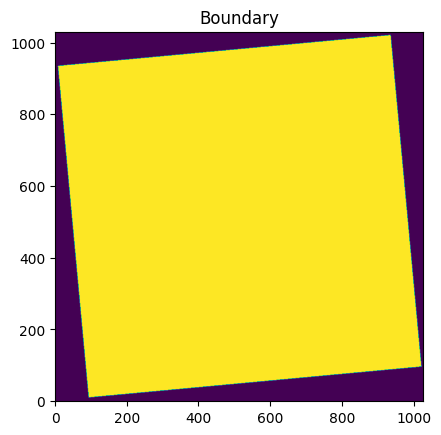

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


((),
 array([[[4458, 4458, 4458, 4458],
         [4957, 4859, 4458, 4458]],
 
        [[4074, 4074, 4074, 4074],
         [3954, 3861, 4074, 4074]],
 
        [[2667, 2667, 2667, 2667],
         [2924, 2779, 2667, 2667]],
 
        [[4606, 4606, 4606, 4606],
         [5059, 4956, 4606, 4606]]], dtype='>i2'))

In [9]:
reload(un)
Fe = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_Fe5576.npy', number_of_frames=79,
                 time=time_list, name_of_line='Fe5576_2011', thresh=[0, 100000],  boundary_methode='search', 
                 boundary_arguments = {"error":0.001}, with_stokes=False)

# Fe.datacube
np.shape(Fe.datacube), Fe.datacube(0)[0:30:5,10:20:5, 100:200:30]


In [10]:
Fe.calculate__FOV_spect_over_time()

In [11]:
secs = un.get_TIME(Fe)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{Fe.shape=}')

the mean cadence is 28.29487179487177 for this line!
Fe.shape=(79, 1, 20, 1031, 1028)


[[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]]
The guessed filters are [[2.8333333333333335, 2.5], [9.5, 2.5], [16.166666666666668, 2.5]]


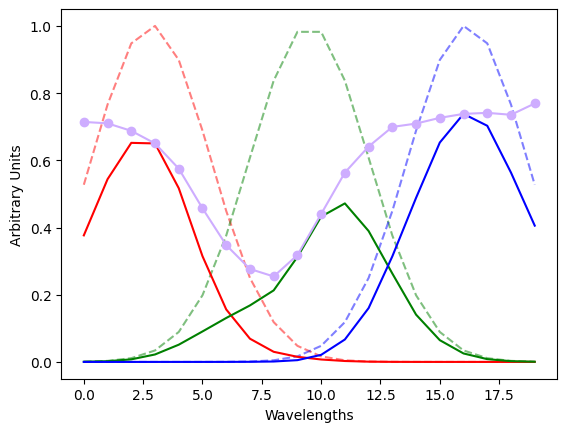

In [12]:
# %matplotlib inline
gf = un.guess_filters(15)
print(gf)
Fe.update_filters(None)# [[3,2], [7,2], [11,2]]
Fe.plot_filt(880,900)
plt.show()

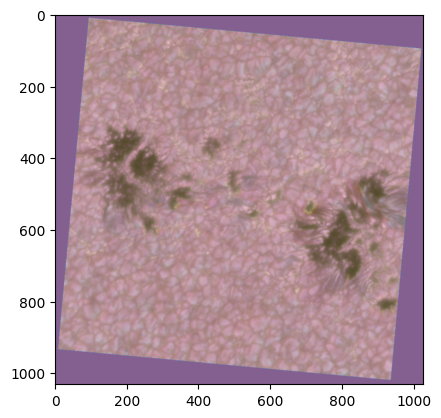

(1031, 1028, 3)


In [14]:
# %matplotlib widget
for frame in range(0,Fe._number_of_frames, 100):
    # frame=0
    Fe.ccp_frame(frame,Show=False)
    plt.imshow(Fe.current_ccp, origin='lower')
    plt.imshow(Fe.calculate_boundary(frame=frame), alpha=0.2)

    # plt.imshow(Fe.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Fe.current_ccp))#,np.shape(Fe.boundary))

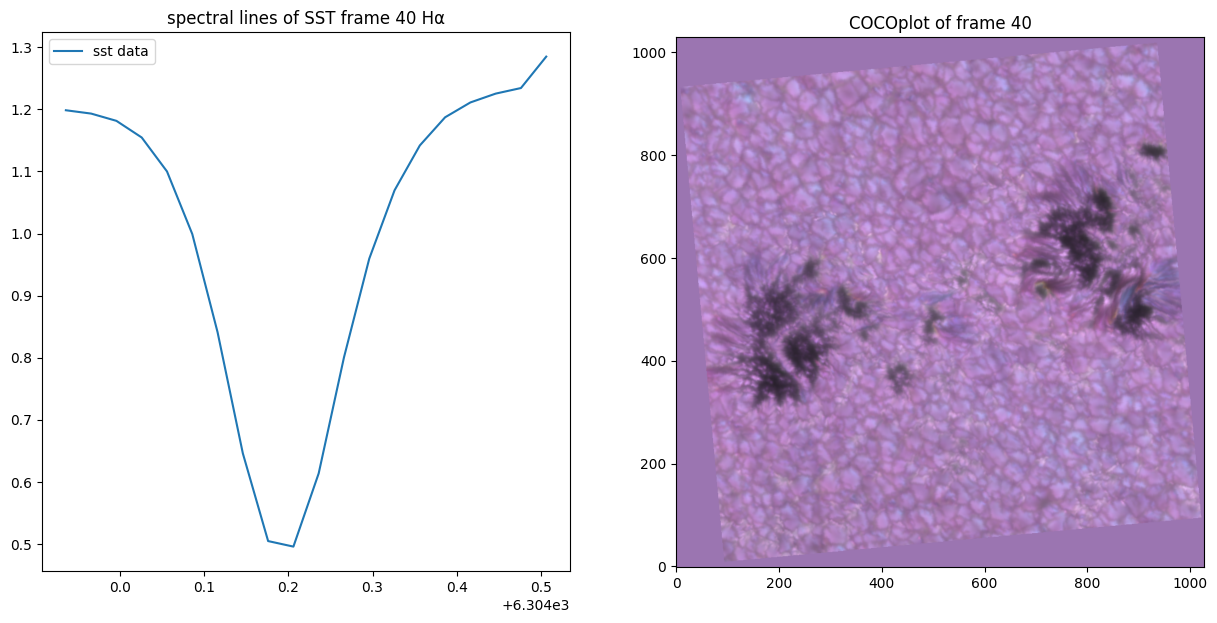

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
Fe.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Fe.frame_integrated_spect(frame)
ax[0].plot(Fe._wavel, Fe.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Fe.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

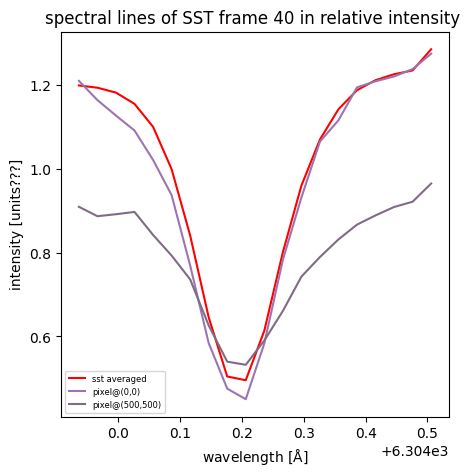

In [16]:
Fe.current_ccp[0:30:10,0:60:20,:]
Fe.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

In [18]:
print('Updated sys.path:', sys.path)
atlas = f.getdata('E:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits')
atlas

Updated sys.path: ['e:\\solar flares\\data\\2011-08-06', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'D:/solar flares/data/2017-09-06', 'E:/solar flares/data/2017-09-06']


array([0.91304463, 0.91184324, 0.88306457, ..., 1.0017935 , 1.0030575 ,
       1.0040228 ], dtype='>f4')

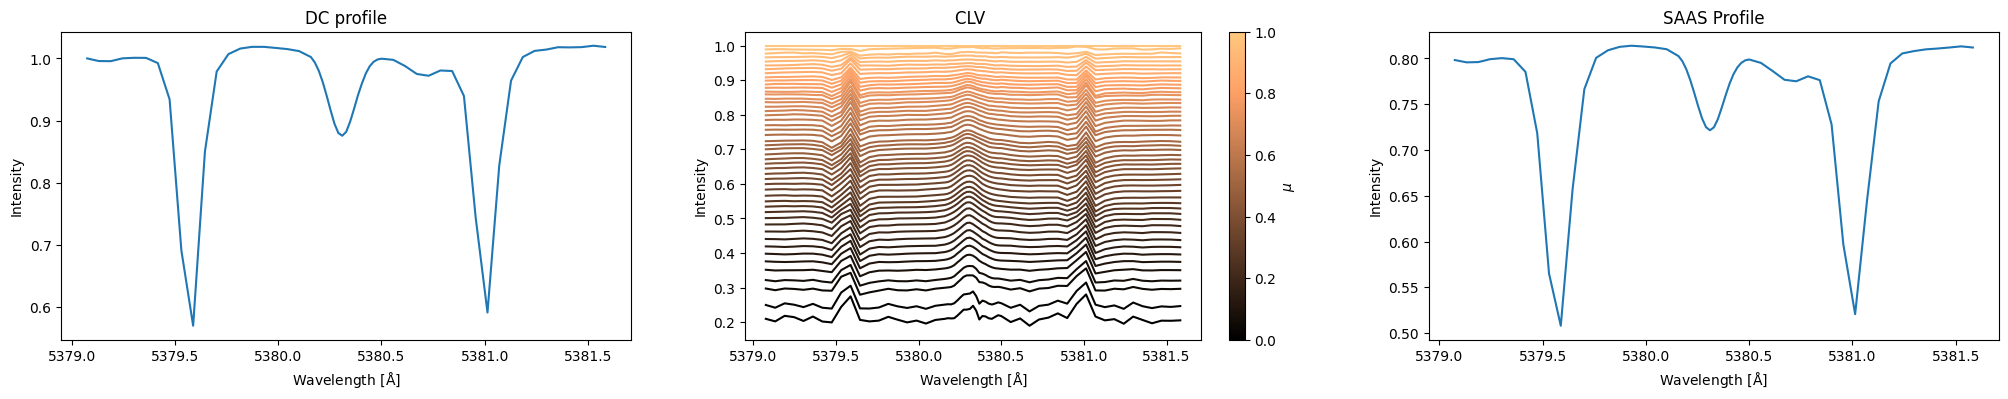

crisp::read_reflectivity: (RL,RH)[5380.32924696399] = (0.851325090256883, 0.9374659470208698)


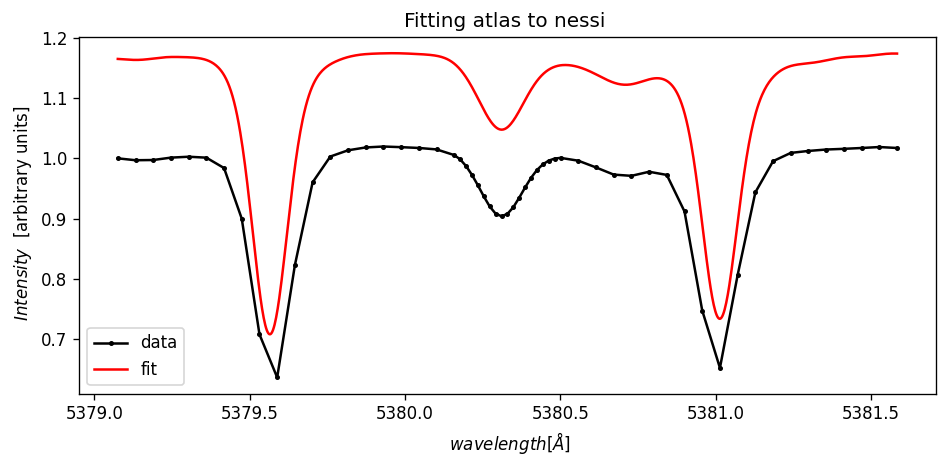

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1117.722761331082
        x: [-1.510e+00  0.000e+00  1.176e+00]
      nit: 5
      jac: [ 2.120e-01  0.000e+00  0.000e+00]
 hess_inv: [[ 8.837e-06  0.000e+00  0.000e+00]
            [ 0.000e+00  1.000e+00  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 256
     njev: 61
de p-waarde is  0.9999883406300912 
Chi^2 reduced= 20.698569654279297 
aantal vrijheidgraden= 54 
chi^2= 1117.722761331082
we behouden de fit tot op een betrouwbaarheidsniveau van  0.9999883406300912 
Oftewel verwerp als p-waarde <lpha-niveau 


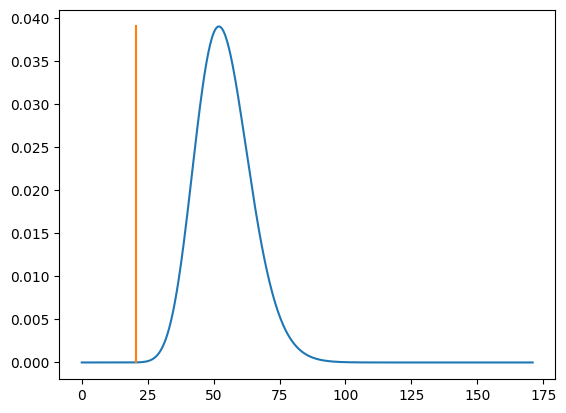

7803


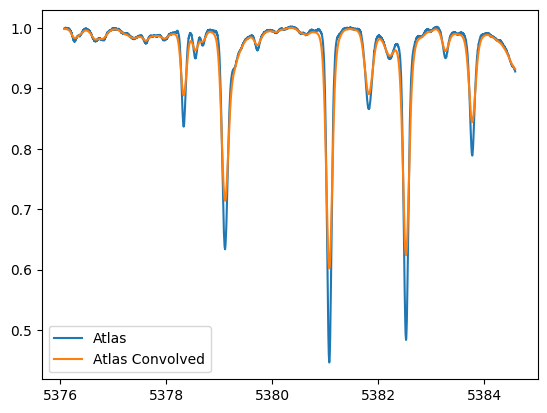

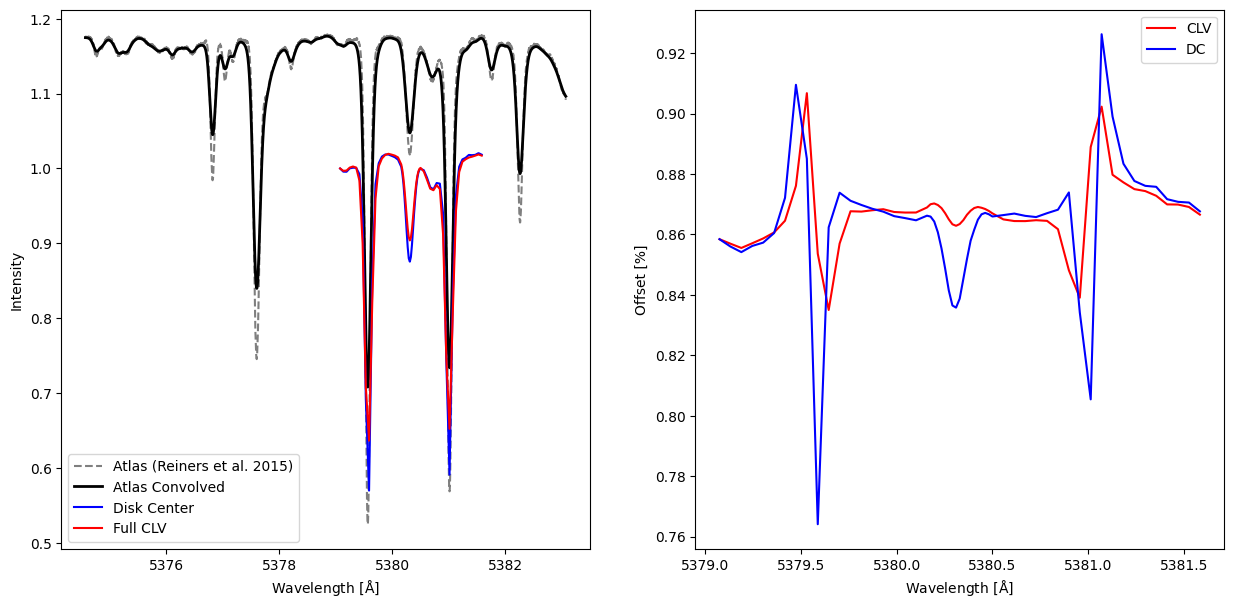

5380.32924696399 5380.32924696399


In [19]:

theor_Fe = un.linestudier('E:/solar flares/data/2017-09-06/fits/5380_clv.fits', atlas=atlas, nr=101)
theor_Fe.saas_profile_atlas_check(show_all=True)
print(np.median(theor_Fe.sst_wav), np.mean(theor_Fe.sst_wav))

## Calculating the $\mu$ !!!!! 


In [20]:
Fe.shape

(79, 1, 20, 1031, 1028)

In [21]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Fe.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        # print(add_enters(str(hdu.header), length_row=79))
        try: 
            print("x =", hdu.header['CRVAL1'], "y=", hdu.header['CRVAL2'])
        except KeyError:
            pass

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

x = -358.975 y= -359.308


[462.785, 522.7850000000001, 144.558, 204.558]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8381792001556458 for timeframe 0


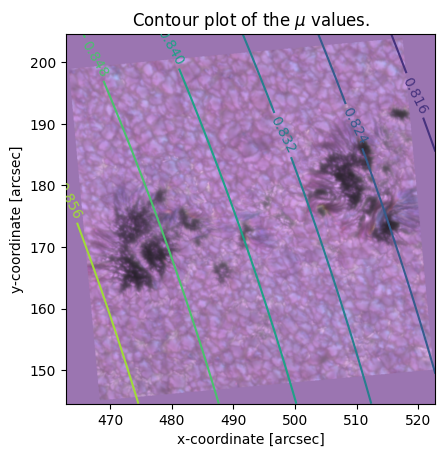

In [22]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 60

position = (492.785, 174.558)

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], Fe.shape[4])
y = np.linspace(fyp[0], fyp[1], Fe.shape[3])

X, Y = np.meshgrid(x, y)

MU = calculate_mu(X,Y)


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)


def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        av_mu = np.average(MU, weights=over.boundary)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

    if over is not None:
        return av_mu
    
mu = give_mu_contourplot(MU, X, Y, fxp, over=Fe)

sst_data = Fe
theor_line = theor_Fe
set_mu(Fe, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Fe.index_mu], theor_line.sst_clv[theor_Fe.index_mu][0], clv_fit(mu, theor_line)


## Finding a suitable quiet sun patch

In [23]:
scaler = Fe.av_spect[0]
frame, Fe.shape

(40, (79, 1, 20, 1031, 1028))

In [24]:
# def qs_visualization(sst_data, frame, xlim, ylim):
#     fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

#     sst_data.ccp_frame(frame,Show=False)


#     ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
#     Fe.frame_integrated_spect(frame)
#     ax[0].plot(Fe._wavel, Fe.av_spect/scaler, label='sst data')
#     ax[0].plot(theor_Fe.sst_wav, theor_Fe.saas_profile, label='saas nessi')
#     ax[0].legend()
#     ax[1].imshow(sst_data.current_ccp, origin='lower')
#     ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]])
#     ax[1].set_title("COCOplot of frame "+str(frame))
#     plt.show()

# def quiet_sun(sst_data, frame, xlim, ylim, show=False, color='blue'):
#     sst_data.quiet_sun = [frame, xlim, ylim]
#     sst_data.quiet_spect=sst_data.area_av_spect(frame, xlim, ylim)
#     sst_data.ccp_frame(frame, Show=False)
#     plt.imshow(sst_data.current_ccp, origin='lower')
#     plt.plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

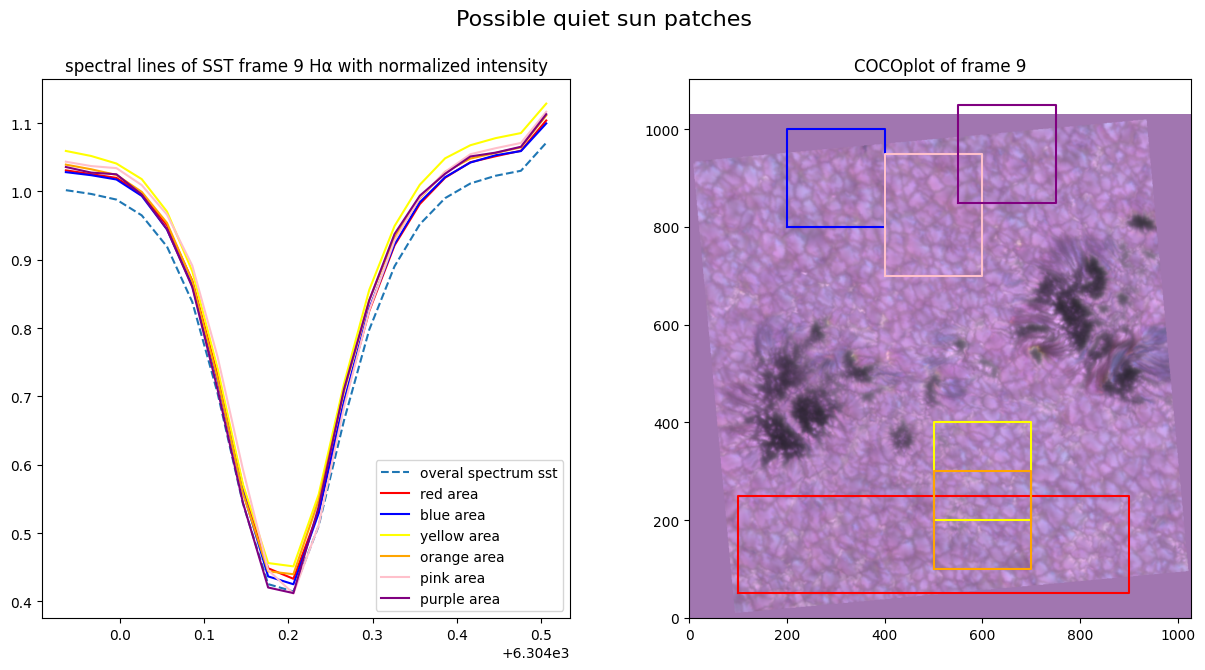

In [25]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Fe.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(100,900),(50,250)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(500,700),(100,300)], [(400,600),(700,950)], 
     [(550,750),(850, 1050)]]    
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Fe.frame_integrated_spect(frame)
ax[0].plot(Fe._wavel, Fe.av_spect/scaler, '--', label='overal spectrum sst')
# ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]
# ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.sst_clv[12] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Fe.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Fe._wavel, Fe.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler, color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Fe.png')
plt.show()


### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [26]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (500, 700) and ylim: (100, 300)


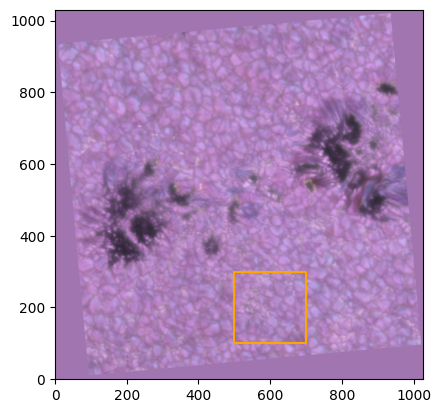

In [27]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Fe.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)


[1.51365614e-06 1.48392236e-06 1.41237144e-06 1.33834394e-06
 1.23374558e-06 1.20356433e-06 1.32835859e-06 1.25313583e-06
 8.80079851e-07 9.43448193e-07 1.42471094e-06 1.73404273e-06
 1.74840519e-06 1.68567063e-06 1.64078553e-06 1.58475299e-06
 1.53880043e-06 1.53423169e-06 1.54787450e-06 1.57817760e-06]


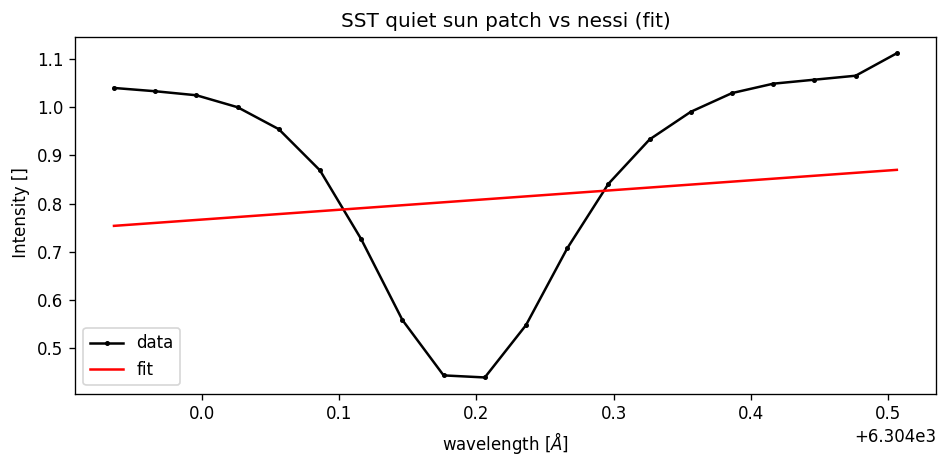

de p-waarde is  0.0 
Chi^2 reduced= 56766.911680960984 
aantal vrijheidgraden= 17 
chi^2= 965037.4985763368
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0 
Oftewel verwerp als p-waarde <lpha-niveau 


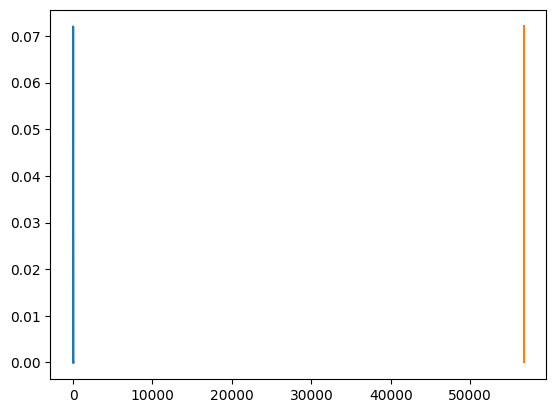

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 965037.4985763368
        x: [ 1.408e+00 -1.818e+02 -5.153e+00]
      nit: 7
      jac: [-1.158e+04  5.691e+04 -2.018e+06]
 hess_inv: [[ 7.234e-06  4.231e-07  6.818e-11]
            [ 4.232e-07  3.962e-08  4.122e-12]
            [ 6.818e-11  4.121e-12  6.467e-16]]
     nfev: 319
     njev: 77

In [28]:
import data_analysis as da
# theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
# theta = [0.2, 0.3, 0.89]

f_nessi_clv = lambda theta: interp1d(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")


g = len(Fe._wavel)

# dY = np.where(theor_Fe.sst_wav<6563.8, 0.01, 10) + np.where(6561.8<theor_Fe.sst_wav, 0.01, 10)

#To simulate a specific domain around the well we cam make the errors on the wings huge
avs = Fe.frame_integrated_spect(Fe.quiet_sun['frame'], Fe.quiet_sun['xlim'], Fe.quiet_sun['ylim'], variation=True)
stds = Fe.var_spect/(400*230)**0.5
print(stds)
data = [Fe._wavel,  avs /scaler,stds/scaler,np.zeros(g)+0.01]

mini = da.optimalisatie(data, model=f_nessi_clv, beginwaarden=np.array([1.5, -0.111, 1.26]), fout_model=None, plot=False)
                                                                #[-0.215, -0.111, 1.26][ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = mini['x']
Fe.theta_nessi_to_quiet_sun = theta
da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="SST quiet sun patch vs nessi (fit)",labelx="wavelength $[\AA]$",
             labely=" Intensity []" , error=False)
da.kwaliteit_fit(data, mini)

mini

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

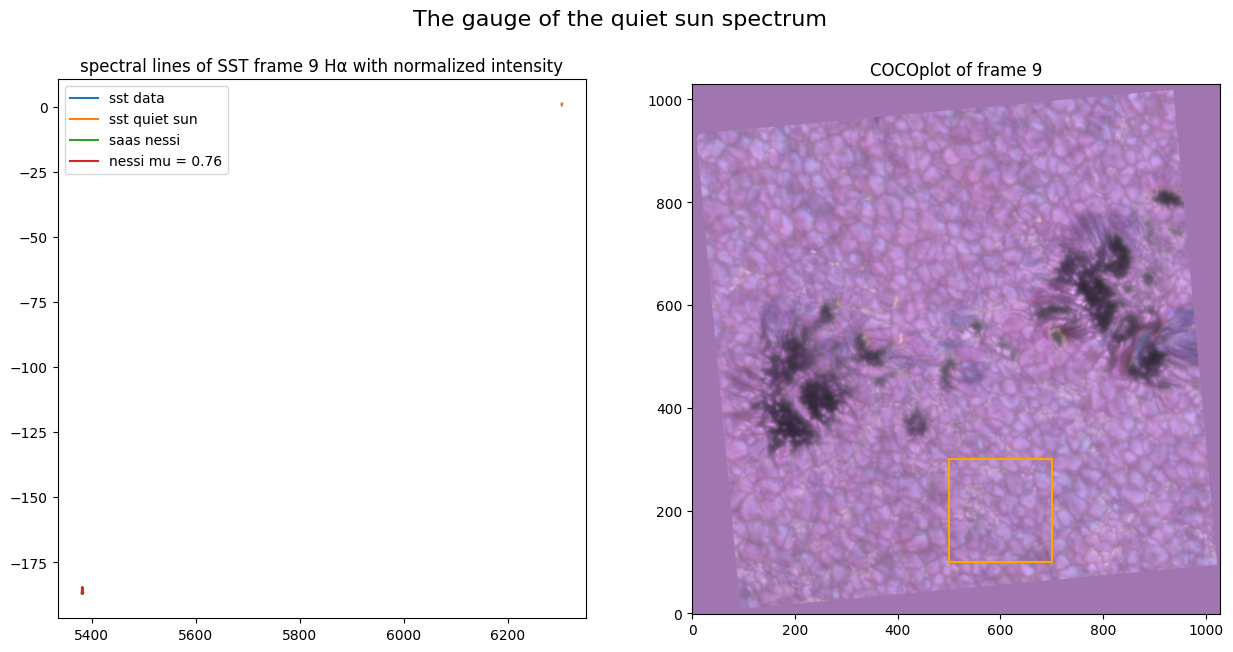

In [29]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('The gauge of the quiet sun spectrum', fontsize=16)

Fe.ccp_frame(frame,Show=False)



ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Fe.frame_integrated_spect(frame)
ax[0].plot(Fe._wavel, Fe.av_spect/scaler, label='sst data')
ax[0].plot(Fe._wavel, Fe.quiet_spect/scaler, label='sst quiet sun') #

ax[0].plot(theor_Fe.sst_wav + theta[0], f_nessi(theta)(theor_Fe.sst_wav + theta[0]), label='saas nessi')
ax[0].plot(theor_Fe.sst_wav + theta[0], f_nessi_clv(theta)(theor_Fe.sst_wav + theta[0]), label='nessi mu = 0.76')
ax[0].legend()
ax[1].imshow(Fe.current_ccp, origin='lower')
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color_wanted_patch)
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

## How big should the flare be (assumption: linear scaling) to make a x% increase in the normal spectom in the line?

if integrated in the full disk spectrum the maximal deviation is  -0.034626688678396356 %.


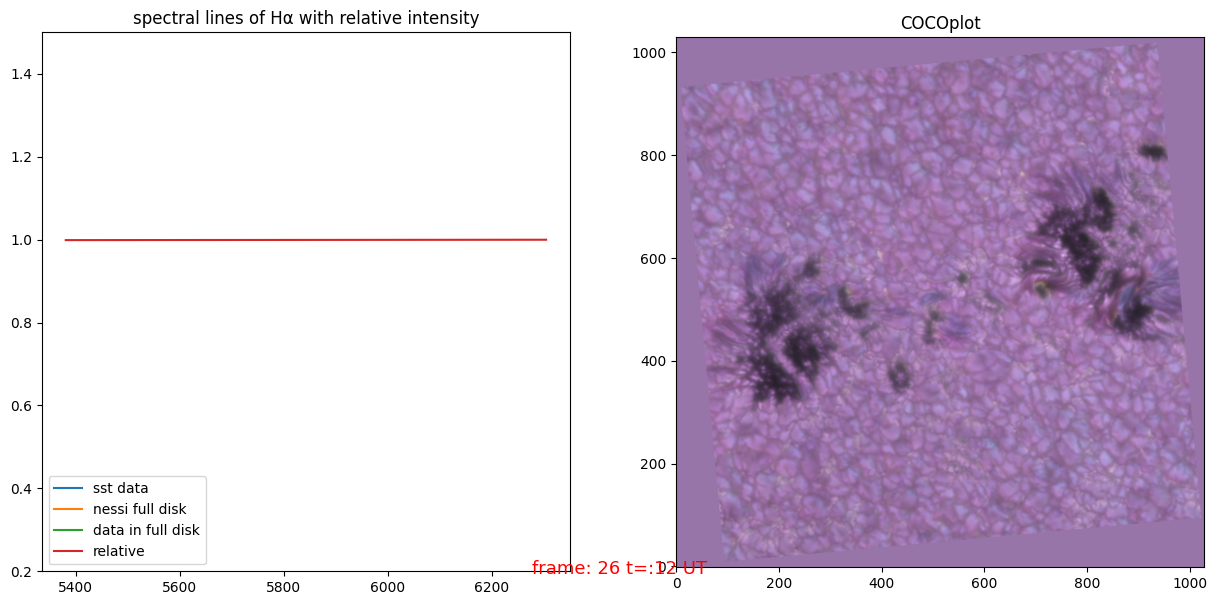

In [30]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
frame = 26

# line_sst, = ax[0].plot([], [], label='sst data')
# line_nessi, = ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# line_quiet_sun, = ax[0].plot(Fe._wavel, Fe.quiet_spect/scaler, label='quiet sun spectr')
Fe.frame_integrated_spect(frame)
Fe.ccp_frame(frame,Show=False)


theor_line = theor_Fe
sst_data = Fe
wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])


f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")



# line_sst, = ax[0, 0].plot(sst_data._wavel, sst_data.av_spect/sst_data.scalar, '--', label='sst data')
# ax[0, 0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# ax[0, 0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')



a=Fe.current_ccp
im = ax[1].imshow(Image.fromarray(a), origin='lower', interpolation='none', aspect='auto', vmin=0, vmax=1)

# Fe.ccp_frame(frame,Show=False)
Fe_tstr=(f"Fe t={Fe._time[frame][0:-7]} UT")

Fe_tstr=Fe_tstr[2:5]+Fe_tstr[7:15]+Fe_tstr[16:]
scaler = 2.7306518951052202e-08
ax[1].text(-280,-15,"frame: "+str(frame)+Fe_tstr, fontsize=13, color='red')

ax[0].set_title("spectral lines of H\u03B1 with relative intensity")

ax[0].plot(wav, f_sst(wav), label='sst data')
# ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.sst_clv[12] + theta[1], label='nessi mu = 0.76')
ax[0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')

areafactor = 60**2 / (np.pi*950**2)

# f_sst_full = lambda theta : f_nessi(theta) + areafactor * (f_sst - f_nessi_clv(theta))
# f_relative = lambda theta : f_sst_full(theta) / f_nessi(theta)
sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))
relative = sst_full / f_nessi(theta)(wav)
print("if integrated in the full disk spectrum the maximal deviation is ",  (np.max(relative)-1)*100, '%.')
# print(f_nessi(theta)(wav), f_sst(wav) - f_nessi_clv(theta)(wav))

# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
areafactor_001 = np.max((f_sst(wav) - f_nessi_clv(theta)(wav))/f_nessi(theta)(wav))**-1 * 0.01
# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
areafactor_010 = areafactor_001 * 10

ax[0].plot(wav, sst_full , label='data in full disk')
ax[0].plot(wav, ((f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))) / f_nessi(theta)(wav)-1)*1+1, label='relative')

ax[0].legend(loc='lower left')
# ax[0].set_xlim([6561, 6565])
ax[0].set_ylim([0.2, 1.5])
ax[1].imshow(Image.fromarray(Fe.current_ccp), origin='lower')
ax[1].set_title("COCOplot")
plt.show()

In [31]:
print("The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.\n",
      areafactor_001, "\t\t this is an increase of ", areafactor_001/areafactor *100, "%",
      "\nThe area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.\n",
      areafactor_010, "\t\t this is an increase of ", areafactor_010/areafactor *100, "%",
      "\nThe real area ratio flare/full disk that the flare has\n", areafactor)

The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
 -0.03666861065404335 		 this is an increase of  -2887.945796052737 % 
The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
 -0.36668610654043354 		 this is an increase of  -28879.457960527372 % 
The real area ratio flare/full disk that the flare has
 0.001269712565386866


Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [32]:
sst_data = Fe
Fe.shape

(79, 1, 20, 1031, 1028)

In [33]:
Fe.calculate__FOV_spect_over_time()

# Best possible interval

![image.png](attachment:image.png)
<!-- ![IMG_20231123_130152(2).jpg](attachment:IMG_20231123_130152(2).jpg) -->

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Felpha line

In [34]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (500, 700), 'ylim': (100, 300), 'color': 'orange'}

E:\solar flares/data/2017-09-06\use_nessi3.py:1696: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
E:\solar flares/data/2017-09-06\use_nessi3.py:1687: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5
E:\solar flares/data/2017-09-06\use_nessi3.py:1684: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral,_ = scipy.integrate.quad(stc, interval[0], interval[1])
E:\solar flares/data/2017-09-06\use_nessi3.py:1684: IntegrationWarning: The occurrence o

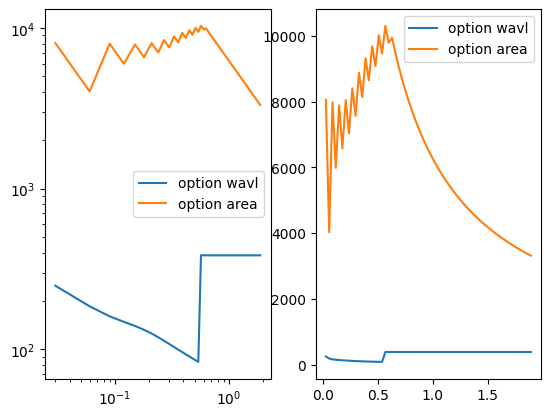

STD_Area = array([16109.12491818,  8054.56245909,  4027.28122967,  7978.23674237,
        5983.67755675,  7885.06398184,  6570.8866515 ,  8039.05051577,
        7034.16920127,  8404.32268531,  7563.89041681,  8874.15711805,
        8134.64402487,  9313.93406346,  8648.65305892,  9679.96344103,
        9074.96572599, 10011.37406765,  9455.18661944, 10299.6203608 ,
        9784.63934275,  9941.12504424,  9489.25572404,  9076.6793882 ,
        8698.48441371,  8350.54503715,  8029.37022803,  7731.98614552,
        7455.84378317,  7198.74572168,  6958.78753096,  6734.31051383,
        6523.86331028,  6326.17048269,  6140.10664496,  5964.67502654,
        5798.98960913,  5642.26016024,  5493.77962971,  5352.91348535,
        5219.09064822,  5091.79575436,  4970.56252211,  4854.96804485,
        4744.62786202,  4639.19168731,  4538.33969411,  4441.77927508,
        4349.24220685,  4260.48216181,  4175.27251858,  4093.40442998,
        4014.68511402,  3938.93633828,  3865.99307275,  3795.70228

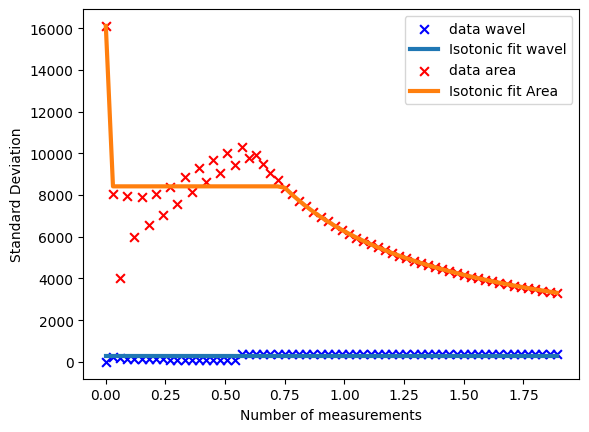

E:\solar flares/data/2017-09-06\use_nessi3.py:1761: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.63\AA$.
at an intesity of -7.132558986910994e-09. For a standard deviation of 8417.659326396288.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=0.63\AA$.
at an intesity of -1.9698312766083694e-07. For a standard deviation of 304.79489482275943.



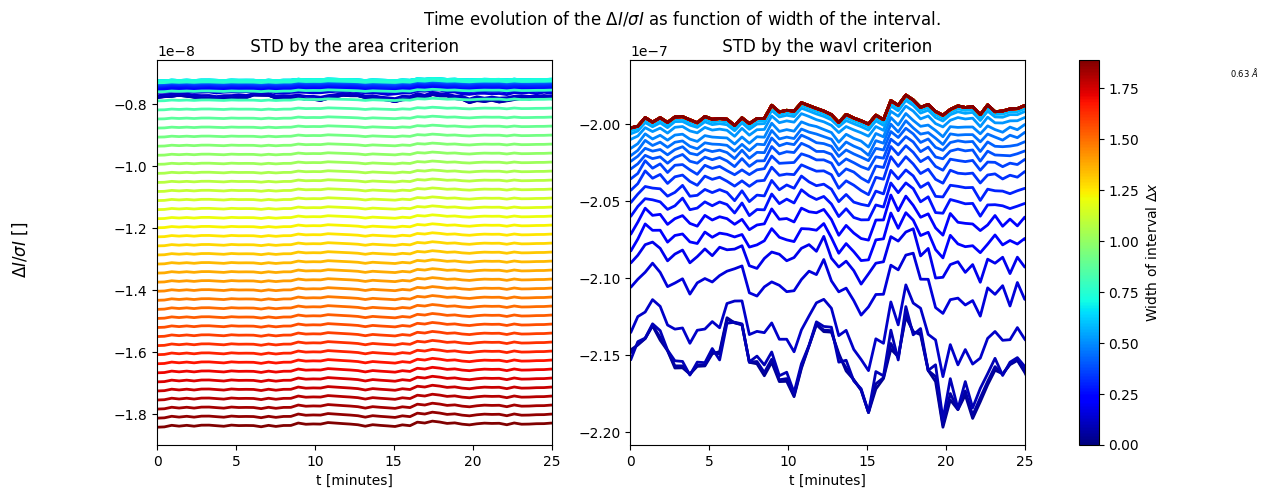

E:\solar flares/data/2017-09-06\use_nessi3.py:1929: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


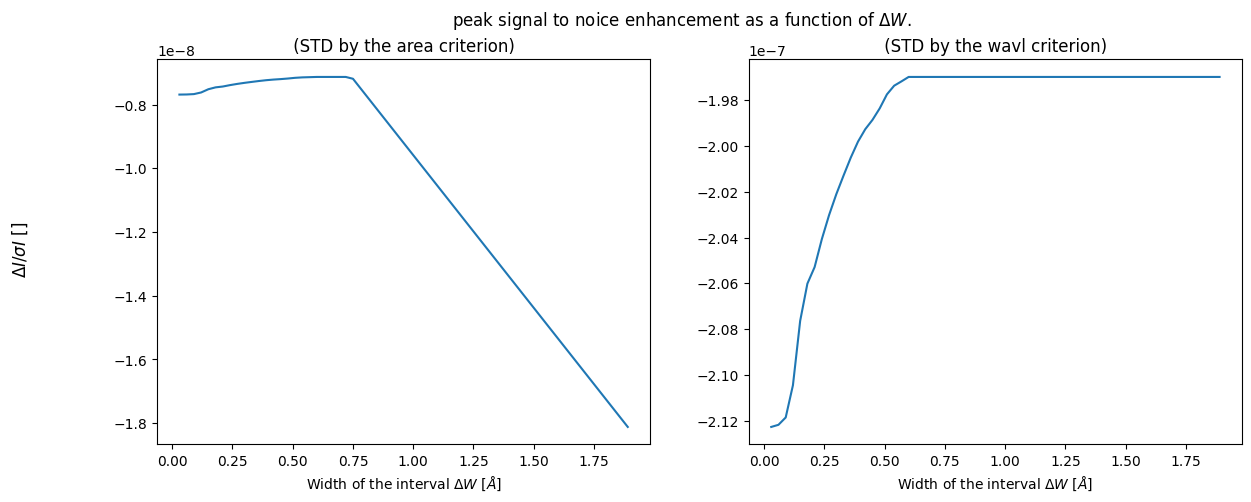

Directory 'line_data/optimal_width' already exists.


(array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-7.77335101e-09, -7.76158314e-09, -7.74646515e-09, ...,
         -7.81131066e-09, -7.80349156e-09, -7.81673912e-09],
        [-7.78075976e-09, -7.75921079e-09, -7.74611136e-09, ...,
         -7.80774193e-09, -7.79962627e-09, -7.81054817e-09],
        ...,
        [-1.78365235e-08, -1.78263108e-08, -1.77765806e-08, ...,
         -1.75858911e-08, -1.76241695e-08, -1.76718292e-08],
        [-1.81289255e-08, -1.81185454e-08, -1.80679999e-08, ...,
         -1.78741844e-08, -1.79130904e-08, -1.79615313e-08],
        [-1.84213275e-08, -1.84107800e-08, -1.83594193e-08, ...,
         -1.81624777e-08, -1.82020112e-08, -1.82512335e-08]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-2.14680173e-07, -2.14355174e-07, -2.13937654e-07, ...,
         -2.15728522e-07, -2.15512578e

In [35]:
reload(un)
un.analyse_optimal_interval(sst_data=Fe, Deltas=np.arange(0,1.9, 0.03))

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [70] at time ['t=09:33:06 UT'].


ValueError: theta[1]=-181.83294560203177 should be zero!

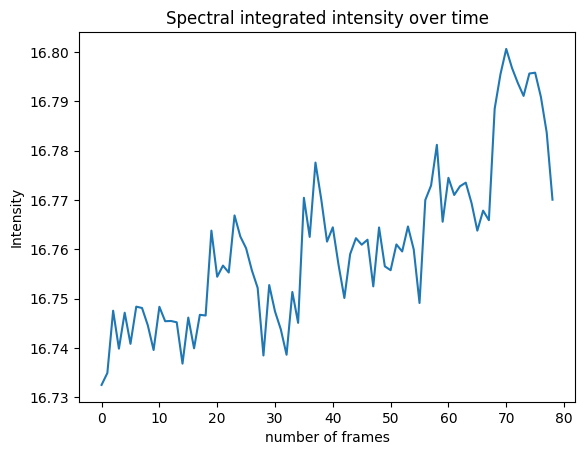

In [40]:
un.save_for_further_analysis(Fe, theor_Fe)


# Movie Making

frame: 0, 08:34:05.827440, total number of frames: 453 


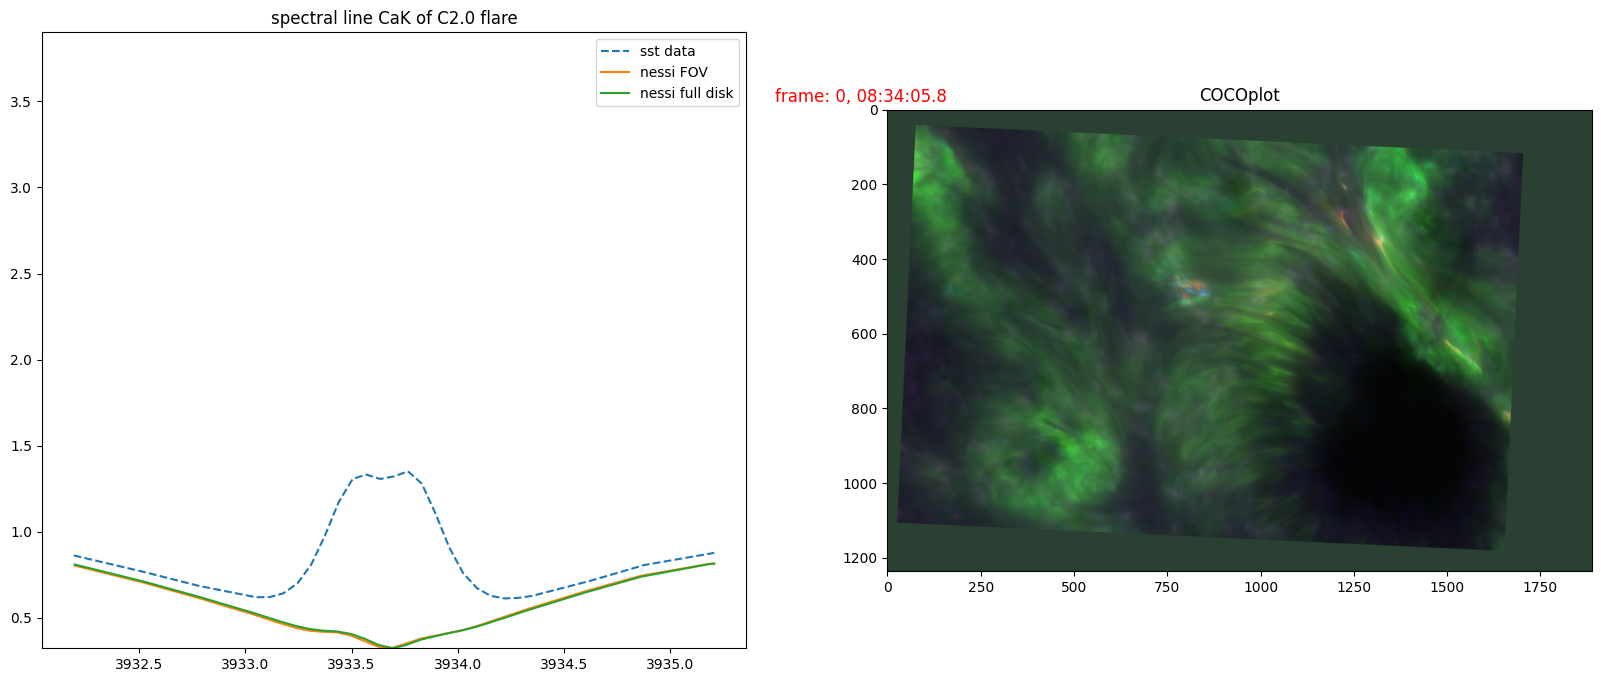

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 

In [ ]:
# fill in here all arguments
theor_line = theor_line
sst_data = Fe
name_of_flare = "C4.1"
name_of_line = "Fe5576"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)
exit()